#  Versuchdaten, Datenframe erstellen und anschauen

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline
  
df = pd.read_csv("data3.csv")

### Datenframe anschauen

In [3]:
df

,b,g,y
0,0.2,13.2,20.0
1,0.2,13.2,17.0
2,0.1,13.0,13.0
3,0.1,13.0,12.0
4,0.1,13.4,20.0
5,0.1,13.4,20.0
6,0.3,13.0,13.2
7,0.3,13.0,14.0
8,0.3,13.4,19.5
9,0.3,13.4,20.0


In [4]:
df.describe()

,b,g,y
count,10.000000,10.000000,10.0000
mean,0.200000,13.200000,16.8700
std,0.094281,0.188562,3.4403
min,0.100000,13.000000,12.0000
25%,0.100000,13.000000,13.4000
50%,0.200000,13.200000,18.2500
75%,0.300000,13.400000,20.0000
max,0.300000,13.400000,20.0000


## Plotten
### Data Plot

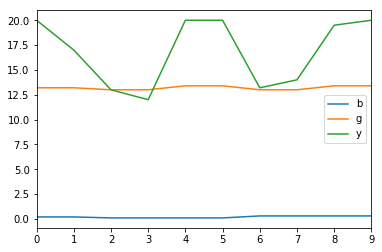

In [5]:
df.plot()

###  Boxplot

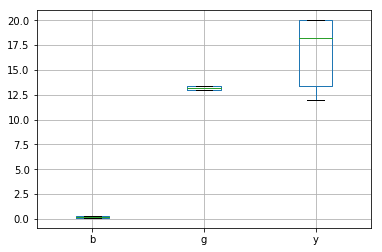

In [6]:
df.boxplot()


### 3D Scatter Plot

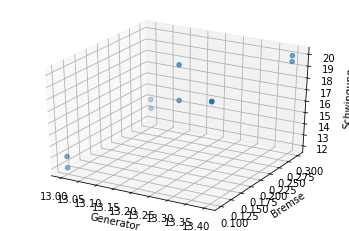

In [7]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df.g, df.b, df.y)
threedee.set_xlabel('Generator')
threedee.set_ylabel('Bremse')
threedee.set_zlabel('Schwingung')
plt.show()

# Ein einfaches Lineares Regressions Model

In [8]:
# Create linear regression object 
regr = linear_model.LinearRegression() 

x= df.iloc[:,0:1]
y= df.iloc[:,2]

regr.fit(x,y)

# Train the model using the training sets regr.fit(x,y) 
y_pred = regr.predict(x) 

print('Koeffizienten: \n', regr.coef_)

print('\nIntercept:', regr.intercept_)

Koeffizienten: 
 [2.125]

Intercept: 16.444999999999997


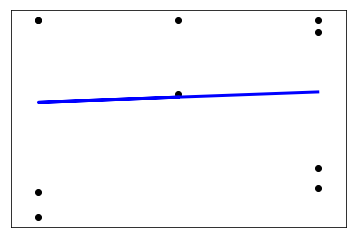

In [9]:
plt.scatter(x,y, color='black') 
plt.plot(x,y_pred, color='blue', linewidth=3) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()

In [10]:
x= df.iloc[:,0:2]
y= df.iloc[:,2]

x= x.values
y=y.values

### Das linear model benötigt numPy arrays, daher formen wir unsere Daten um, X zu einem 2-dimensionalen 25x2, bzw. Y zu 25, eindimensional

In [11]:
x.shape

(10, 2)

In [12]:
y.shape

(10,)

### Model Fitten

In [13]:
model = LinearRegression().fit(x, y)

### Model Parameter und Anpassungsgüte betrachten

In [14]:
print('intercept:', model.intercept_)


intercept: -208.77999999999963


In [15]:
print('slope:', model.coef_)

slope: [ 2.125  17.0625]


In [16]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8779724185841299


### Model nutzen um Werte vorherzusagen

In [17]:
yPred= model.predict(x)

# Fortgeschritten: Statsmodel package, zahlreiche Statistiken

In [18]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     25.18
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           0.000635
Time:                        17:54:27   Log-Likelihood:                -15.501
No. Observations:                  10   AIC:                             37.00
Df Residuals:                       7   BIC:                             37.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -208.7800     31.815     -6.562      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


# Pfad des steilsten Anstiegs

In [19]:
## Daten einlesen
df = pd.read_csv("data3.csv")

## Modell-X sind Generator und Bremse in den Daten
X = np.c_[df.g, df.b]
## Modell-Y ist die Schwingung
y = df.y

## Modell Bauen und Ausgeben
res = smf.ols('y ~ g+b ', data = df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     25.18
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           0.000635
Time:                        17:54:27   Log-Likelihood:                -15.501
No. Observations:                  10   AIC:                             37.00
Df Residuals:                       7   BIC:                             37.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -208.7800     31.815     -6.562      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


## Modell Koeffizienten
Die Koeffizienten des Regressionsmodells zeigen die Richtung des steilsten Anstiegs im Modell.

In [20]:
## Die Koeffizienten sind in .params gespeichert
print(res.params)

Intercept   -208.7800
g             17.0625
b              2.1250
dtype: float64


In [26]:
## Koeffizienten extrahieren
beta = np.c_[res.params.g, res.params.b]

## Mittelpunkt der Generator / Bremse -- ACHTUNG -- nicht der Mittelwert / Mean!
cb = np.min(df.b) + (np.max(df.b) - np.min(df.b))/2.0
cg = np.min(df.g) + (np.max(df.g) - np.min(df.g))/2.0
center = np.c_[cg, cb]

## Ausgehend vom berechneten Mittelpunkt mit vorgegebener Schrittweite gehen.
stepwidth = 0.5
for i in range(10):
    xnew = center + i * stepwidth * beta
    print(xnew)

[[13.2  0.2]]
[[21.73125  1.2625 ]]
[[30.2625  2.325 ]]
[[38.79375  3.3875 ]]
[[47.325  4.45 ]]
[[55.85625  5.5125 ]]
[[64.3875  6.575 ]]
[[72.91875  7.6375 ]]
[[81.45  8.7 ]]
[[89.98125  9.7625 ]]


# Modell 2. Ordnung

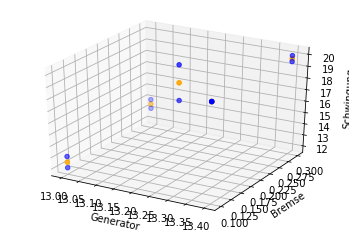

In [22]:
from sklearn.preprocessing import PolynomialFeatures

## Daten einlesen
df = pd.read_csv("data3.csv")

## Modell-X sind Generator und Bremse in den Daten
X = np.c_[df.g, df.b]
## Modell-Y ist die Schwingung
y = df.y

## 2. Grades
poly = PolynomialFeatures(degree=2)

#transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
xp = poly.fit_transform(X)

## Modell fitten
model = sm.OLS(y, xp).fit()

## Punkte für Plot vorhersagen
y_pred = model.predict(xp)

## Plotten
p = plt.figure().gca(projection='3d')
p.scatter(X[:,0], X[:,1], y, color='blue')
p.set_xlabel('Generator')
p.set_ylabel('Bremse')
p.set_zlabel('Schwingung')
p.scatter(X[:,0], X[:,1], y_pred, color='orange')
plt.show()

## Predict New Data

In [23]:
xnew = np.c_[15,0.2]
xnew_p = poly.fit_transform(xnew)
ynew = model.predict(xnew_p)
ynew

array([53.85718025])

In [24]:
model.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     23.20
Date:                Sun, 12 Jan 2020   Prob (F-statistic):            0.00199
Time:                        17:54:28   Log-Likelihood:                -11.150
No. Observations:                  10   AIC:                             32.30
Df Residuals:                       5   BIC:                             33.81
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.2988      3.551     -2.900      0.034     -19.427      -1.170
x1           -17.4080      3.743     -4.651      0.006     -27.030      -7.786
x2           308.6687    246.180      1.254      0.265    -324.158     941.496
x3             1.4335      0.298      4.812      0.005       0.668       2.199
x4           -16.8750     18.448     -0.915      0.402     -64.296      30.546
x5          -209.4842     82.519     -2.539      0.052    -421.605       2.636
==============================================================================
Omnibus:                        1.774   Durbin-Watson:                   2.888
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                0.095
Skew:                          -0.000   Prob(JB):                        0.954
Kurtosis:                       3.477   Cond. No.                     8.68e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.06e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""